**Tutorial: Creating More Complex Visualizations with ScanPyImports**

Here's an example showcasing the packages I frequently use in my projects. I'm sharing it to provide ideas on how to create more complex visualizations using `ScanPyImports`,  `Matplotlib` and `WordCloud`.

Feel free to customize these visualizations to suit your needs and apply the code to your own projects.
### Importing Libraries
 

In [1]:
from ScanPyImports.plotter import DataPlotter
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from matplotlib.patches import FancyBboxPatch
import math
import random
import warnings

# Ignore warnings for clean output
warnings.filterwarnings("ignore")

### Setting Up Constants and Utility Functions
Next, we define some constants and utility functions that will help us in creating the visualizations.

In [2]:
# Constants for styling
ROUNDING = 0.1
BOXSTYLE_BG = f'round, pad=0.01, rounding_size={ROUNDING}'

# Add custom background to a plot (Axes)
def box_bg(ax, color):
    box = FancyBboxPatch((0, 0), 1, 1, boxstyle=BOXSTYLE_BG,
                          ec='none', fc=color, clip_on=False, transform=ax.transAxes, zorder=0)
    ax.add_patch(box)

# Define a color palette
def tab20() -> dict[str, tuple]: 
    """Tableau 20 colors hex codes. 

    Returns:
        Dictionary {color name: (dark, light)}
    """
    colors = {
        'blue': ('#1f77b4', '#aec7e8'),
        'orange': ('#ff7f0e', '#ffbb78'),
        'green': ('#2ca02c', '#98df8a'),
        'red': ('#d62728', '#ff9896'),
        'purple': ('#9467bd', '#c5b0d5'),
        'brown': ('#8c564b', '#c49c94'),
        'pink': ('#e377c2', '#f7b6d2'),
        'gray': ('#7f7f7f', '#c7c7c7'),
        'olive': ('#bcbd22', '#dbdb8d'),
        'cyan': ('#17becf', '#9edae5')
    }
    return colors


# Generate the colors to be used for the words in the Cloud plot
def words_colors():
    """Colors in format `rgb(r, g, b)` as required by the WordCloud object."""
    colors = tab20()
    light_colors = [to_rgb(val[1]) for _, val in colors.items()]
    light_colors += [(1.0,) * 3] * 10  # Fill with more whites
    RGB = lambda x: math.floor(x * 255)
    colorsRGB = [f'rgb{(RGB(a), RGB(b), RGB(c))}' for a, b, c in light_colors]
    return colorsRGB

# Function to randomly choose a color for the Cloud plot
def color_func(*args, **kwargs):
    """Function to be passed as `**kargs` of the Cloud plot.
    
    It follows the requirements of the WordCloud Api."""
    colors = words_colors()
    return random.choice(colors)

### Fancy Spiral Plot Function
We define a function `fancy_spiral` to create a spiral plot with custom foreground and background colors.

In [3]:
def fancy_spiral(plot, ax, fg_color, bg_color, title_text= None,  fontname='Arial Rounded MT Bold'):
    # Create a spiral plot
    kwargs = dict(edgecolor=bg_color, facecolor=fg_color)
    _, ax, _, texts = plot.spiral_frequencies(top=25,
                                              label_padding=5,
                                              ax=ax,
                                              **kwargs)
    
    # Adjust the properties of the bar labels
    for text in texts:
        text.set_fontsize('x-large')
        text.set_color(fg_color)
        text.set_font(fontname)

    # Set the title properties
    if title_text:
        ax.set_title(title_text
                        , y = 0.9, x = 0.1
                        , ha = 'left', va = 'top'
                        , color = bg_color
                        , fontsize = 'x-large'
                        , fontweight = 'bold'
                        , fontname = fontname
                        , bbox = dict(facecolor=fg_color # Background color of the title box
                                    , edgecolor='none'
                                    , boxstyle='round,pad=1') 
                        )

    # Add a background round box to the plot
    box_bg(ax, bg_color)
    
    return  ax, texts

### Fancy Cloud Plot Function

In [4]:
def fancy_cloud(plot, ax, bg_color, fontname='Impact'):

    # Add box background
    box_bg(ax, bg_color) # Has to be added first!

    # Set the font if provided
    if fontname:
        plot.settings.set_font(fontname)

    # Define `**kwargs` parameters for the cloud plot
    kwargs = dict(color_func=color_func, max_words=200)

    # Define the `imshow` parameter.
    # Here we ajust the size of the image to get some space 
    #   between the image and axis
    shrink = 0.10
    imshow = dict(extent=(0 + shrink, 1 - shrink, 0 + shrink, 1 - shrink),
                  transform=ax.transAxes)

    # Generate the cloud plot
    _, ax, wc, _ = plot.cloud_frequencies(ax=ax, imshow=imshow, **kwargs)
    return ax, wc

### Setting Up Projects and DataPlotters
We initialize a DataPlotter object per project (directories).

In [5]:
# Define the projects to analyze
# These are my project directories, but you can provide your own directories and projects names!
projects = {
'@Graz' : DataPlotter(r"D:\Dropbox\Research\DigitalComp"),
'@WU' : DataPlotter(r'D:\Dropbox\Research\MigrationAT'),
'All' : DataPlotter(r'D:\Dropbox')
}

# Exclude specific packages by setting the `to_exclude` attribute
to_exclude = ['my_scripts', 'my_package', 'my_plots', 'my_module', 'my_sum']
for  plotter in projects.values():
    plotter.to_exclude = to_exclude

### Creating the Visualization
Finally, we create a mosaic plot with different subplots for each project.

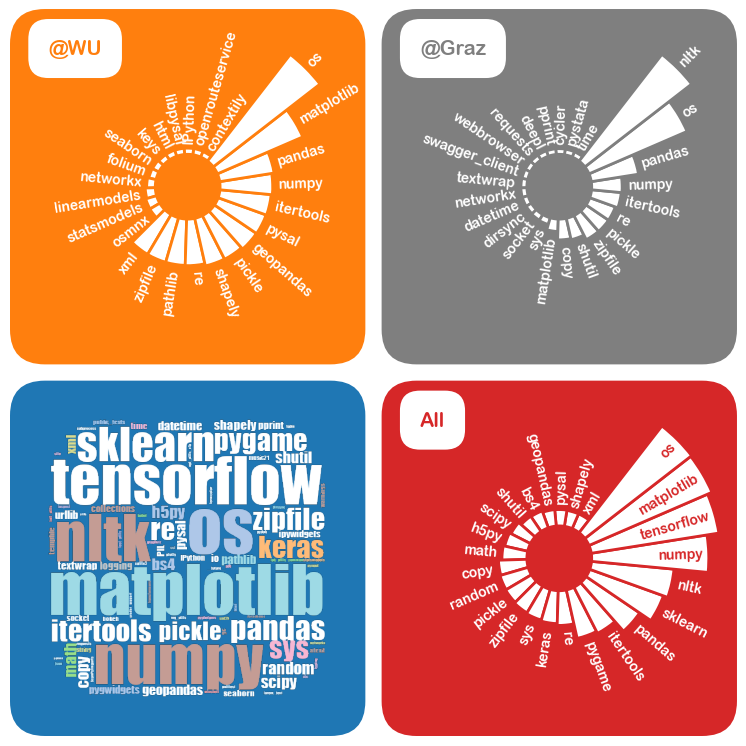

In [6]:
# Define subplot configuration
# Note: The projection for spiral plots must be 'polar'
per_subplot_kw = {key: {'projection': 'polar'} for key in projects.keys()}

# Set up the figure and axes
size = 4.5
fig, axs = plt.subplot_mosaic([['@WU', '@Graz'],
    ['cloud', 'All']], 
    per_subplot_kw=per_subplot_kw, 
    figsize=(size * 2, size * 2), 
    gridspec_kw={
        "bottom": 0.1,
        "top": 0.9,
        "left": 0.1,
        "right": 0.9,
        "wspace": 0.1 * 2 / 3,
        "hspace": 0.1 * 2 / 3
    }
)

# Define colors
colors = tab20()

# Create cloud plot for the project 'All' 
bg_color = colors['blue'][0]
axs['cloud'], wc= fancy_cloud(projects['All'], ax=axs['cloud'],bg_color=bg_color)

# Create spiral plots for each project
fg_color = 'white'
bg_colors = ['gray', 'orange', 'red']
for (project, plot), color  in zip(projects.items(),bg_colors):
    bg_color = colors[color][0]
    axs[project], texts = fancy_spiral(plot, axs[project]
                                , fg_color, bg_color
                                , title_text=project)
    # Manually adjust labels that go out of the plot (`All` spiral) 
    if project == 'All':
        for text in texts[-4:]:
            text.set_horizontalalignment('right') 
            x,y = text.get_position()
            text.set_position((x,y-10))
            text.set_color(bg_color)